V1

a)Write a function that will plot a scatterplot matrix of your red wine data. Your function should plot wines with quality over some “good_threshold” as one color,and wines below some “bad_threshold” as another. Your plotting function should have the option to save a .png of your plots.

b) I think more useful gonna be volatile acidity, chlorides and sulphates, because on their plots you can clearly discinguish classes by straight line.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import time
import random

In [64]:
good_color = 'green'
bad_color = 'red'
good_thresh_level = 7
bad_thresh_level = 4
features = ['alcohol', 'pH']
choose_color = lambda value: good_color if value else bad_color

In [3]:
wine_data = pd.read_csv("/home/ahavriushen/Desktop/uf_projects/ft_sommelier/resources/winequality-red.csv", header=0, sep=';')

In [4]:
def get_x_y_color(dataset, i, j, good_threshold, bad_threshold):
    x = pd.to_numeric(dataset[dataset.columns[i]])
    y = pd.to_numeric(dataset[dataset.columns[j]])
    asked_quality = (dataset['quality'] > good_threshold) | (dataset['quality'] < bad_threshold)
    x = x[asked_quality]
    y = y[asked_quality]
    color = dataset['quality'][asked_quality]
    color = color.map(lambda l: good_color if int(l) > good_threshold else bad_color)
    return x, y, color
        

def plot_scatter_matrix(wine_data, good_threshold, bad_threshold, save_plot=False):
    size = len(wine_data.columns) - 1
    columns = [t.replace(' ','\n') for t in wine_data.columns]
    fig, axes = plt.subplots(size, size, figsize=(25,25))
    for i in range(size):
        for j in range(size):
            if i == j:
                axes[i, j].text(0.5, 0.5, columns[i], fontsize = 20,
                                horizontalalignment='center', verticalalignment='center')
                axes[i, j].set_yticklabels([])
                axes[i, j].set_xticklabels([])
            else:
                x, y, color = get_x_y_color(wine_data, j, i, good_threshold, bad_threshold)
                axes[i, j].scatter(x, y, c=color, s=4)
                axes[i, j].set_yticklabels([])
                axes[i, j].set_xticklabels([])
    plt.subplots_adjust(wspace=0,hspace=0)
    plt.show()
    
    if save_plot:
            plt.savefig('plot.png')

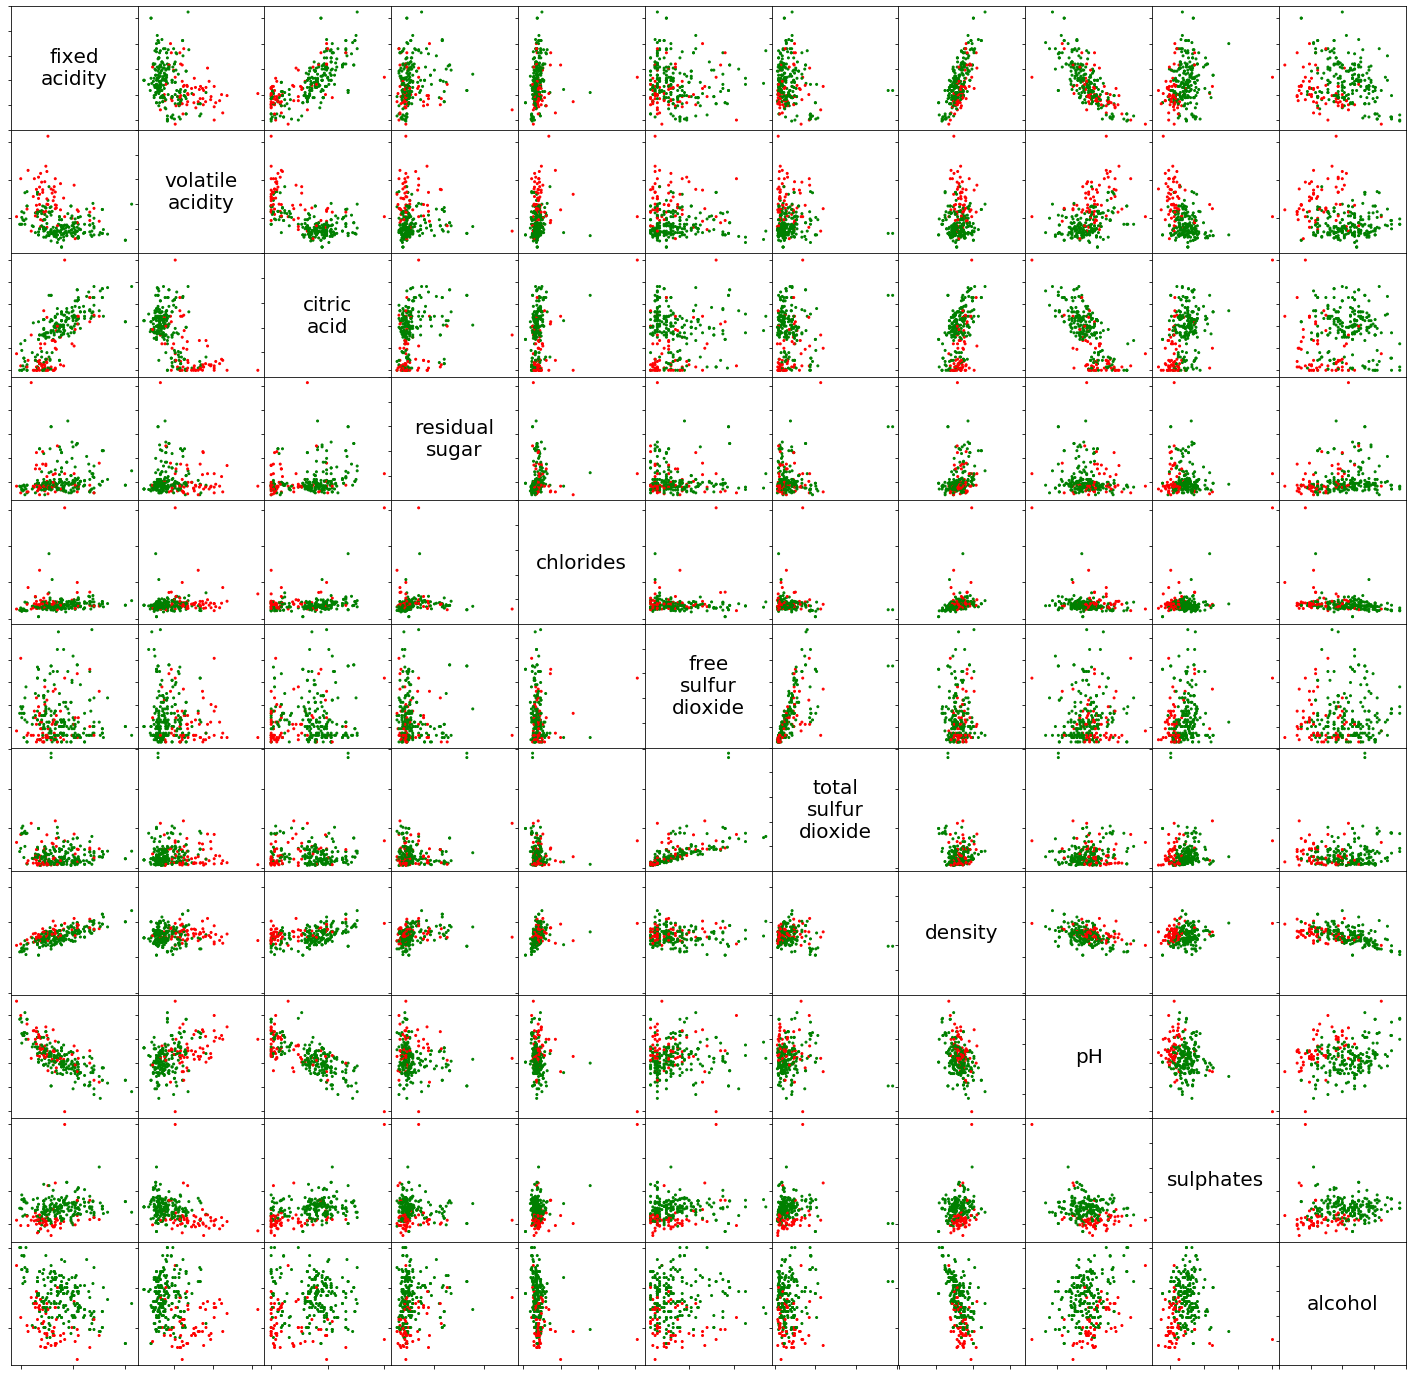

In [5]:
#plot_scatter_matrix(wine_data, 7, 4)
plot_scatter_matrix(wine_data, 6, 5)

v2

In [6]:
def get_random():
    return random.uniform(-0.15, 0.15)

def init_layer(n_weights):
    bias = get_random()
    weight = []
    for i in range(n_weights):
        weight.append(get_random())
    layer = {'w':weight, 'b': bias}
    return layer

In [7]:
def init_perceptron(n_weights, n_layer=1):
    #add init with for over layers 
    #perceptron = []
    #perceptron.append(init_layer(n_weights))
    perceptron = init_layer(n_weights)
    return perceptron

In [8]:
def heaviside(x):
    return (1 if x > 0 else 0)

In [9]:
def one_layer(x, layer, act_func=heaviside):
    result = 0
    for i in range(len(x)):
        result += x[i] * layer['w'][i]
    result += layer['b']
    return act_func(result)

In [10]:
def make_prediction_vector(x, perceptron):
    #for multilayers add for over all layers
    #   for layer in perceptron:
    y = []
    for i in range(len(x)):
        y.append(one_layer(x[i], perceptron))
    return y

In [11]:
def layer_update(x, y_real, y_pred, layer, learning_rate):
    error = y_real - y_pred
    weight_updated = []
    for i in range(len(layer['w'])):
        weight_updated.append(layer['w'][i] + learning_rate * error * x[i])        
    bias_updated = layer['b'] + learning_rate * error
    layer_updated = {'w': weight_updated, 'b': bias_updated}
    return layer_updated

In [12]:
def train_step_stochastic(x, y_real, perceptron, learning_rate):
    #for multilayers add for over all layers
    for i in range(len(y_real)):
        y_pred = make_prediction_vector([x[i]], perceptron)       
        perceptron = layer_update(x[i], y_real[i], y_pred[0], perceptron, learning_rate)
    return perceptron

In [13]:
def train_step_vector(x, y_real, perceptron, learning_rate):
    y_pred = make_prediction_vector(x, perceptron)
    #for multilayers add for over all layers
    for i in range(len(y_real)):
        perceptron = layer_update(x[i], y_real[i], y_pred[i], perceptron, learning_rate)
    return perceptron

In [14]:
def loss_function(y_real, y_pred):
    n = len(y_real)
    res = 0
    for i in range(n):
        res += y_real[i] != y_pred[i]
    return res        

In [15]:
def stop_condition(current_epoch, n_epoch, loss):
    if n_epoch == 0:
        return loss > 0
    return current_epoch < n_epoch

In [16]:
def training(x, y_real, perceptron, n_epoch, learning_rate=1e-4):
    current_epoch = 0
    output = []
    loss = 1
    while stop_condition(current_epoch, n_epoch, loss):
        perceptron = train_step_stochastic(x, y_real, perceptron, learning_rate)
        y_pred = make_prediction_vector(x, perceptron)
        loss = loss_function(y_real, y_pred)
        output.append((current_epoch, loss, perceptron))
        current_epoch += 1
    return output

In [17]:
def prepare_x(dataset, x_column, good_threshold, bad_threshold):
    asked_quality = (dataset['quality'] > good_threshold) | (dataset['quality'] < bad_threshold)
    x = dataset[x_column].apply(pd.to_numeric)
    x = x[asked_quality].values.tolist()
    return x

In [18]:
def prepare_y(dataset, y_column, good_threshold, bad_threshold):
    y = dataset[y_column].apply(pd.to_numeric)
    y = y.values.tolist()
    y_binar = []
    for i in range(len(y)):
        if y[i] > good_threshold:
            y_binar.append(1)
        if y[i] < bad_threshold:
            y_binar.append(0)
    return y_binar

In [19]:
def train_run(data, feature_name, n_epoch, good_thresh, bad_thresh):
    x = prepare_x(data, feature_name, good_thresh, bad_thresh)
    y = prepare_y(data, 'quality', good_thresh, bad_thresh)
    perceptron = init_perceptron(len(feature_name))
    train_res = training(x, y, perceptron, n_epoch)
    return train_res    

In [39]:
def left_plot_perfomance(ax_left, performance, epoch):
    ax_left.set_title('Errors as a function of epoch')
    ax_left.set_xlabel('')
    ax_left.set_ylabel('classification errors')
    ax_left.set_xlim(-0.01 * len(performance), len(performance)*1.01)
    #ax_left.set_ylim()
    list_of_epoch = [elem[0] for elem in performance[0:epoch]]
    list_of_loss = [elem[1] for elem in performance[0:epoch]]
    ax_left.plot(list_of_epoch, list_of_loss, color='blue')
    return ax_left

In [21]:
def get_line(koef):
    a1 = koef['w'][0]
    a2 = koef['w'][1]
    b = koef['b']
    if a2 != 0:
        line = lambda t1, _: (t1, -t1*a1/a2 - b/a2 )
    elif a1 != 0:
        line = lambda _, t2: (-t2*a2/a1 - b/a1, t2)
    else:
        line = lambda _, __: (0, 0)
    return line

In [69]:
def subplane_side(p1, p2, w):
    res = 0
    for i in range(len(p1)):
        res += (p2[i] - p1[i]) * w[i] * (-1)**i
    return res > 0

In [44]:
def get_bound(axis):
    bound = [min(axis), max(axis)]
    gap = (bound[1] - bound[0]) / len(axis)
    bound = [bound[0] - gap, bound[1] + gap]
    return bound

In [66]:
def right_plot_perfomance(ax_right, wine_data, good_thresh, bad_thresh, performance, epoch):
    feature_name = wine_data.columns[0:2]
    x1x2 = prepare_x(wine_data, feature_name, good_thresh, bad_thresh)
    x1 = [elem[0] for elem in x1x2]
    x2 = [elem[1] for elem in x1x2]
    y = prepare_y(wine_data, 'quality', good_thresh, bad_thresh)
    color = [choose_color(elem) for elem in y]

    x_bound = get_bound(x1)
    y_bound = get_bound(x2)
    ax_right.set_xlim(x_bound[0], x_bound[1])
    ax_right.set_ylim(y_bound[0], y_bound[1])
    ax_right.set_title('Decision boundary on epoch: ' + str(epoch))
    ax_right.set_xlabel(feature_name[0])
    ax_right.set_ylabel(feature_name[1])
    
    line_eq = get_line(performance[epoch-1][2])
    p1 = line_eq(x_bound[0], y_bound[0])
    p2 = line_eq(x_bound[1], y_bound[1])
    normal = performance[epoch-1][2]['w']
    ax_right.plot([p1[0], p2[0]], [p1[1], p2[1]], "b--")
    ax_right.fill_between([p1[0], p2[0]], [p1[1], p2[1]], y_bound[0], alpha=0.5,
                    facecolor=choose_color(subplane_side(p1, p2, normal)))
    ax_right.fill_between([p1[0], p2[0]], [p1[1], p2[1]], y_bound[1], alpha=0.5,
                    facecolor=choose_color(subplane_side(p2, p1, normal)))
    """
ax.plot(x, y1, x, y2, color='black')

ax.fill_between(x, y1, y2, where=y2 <= y1, facecolor='red', interpolate=True)
    """    
    #y = (-(b / w2) / (b / w1))x + (-b / w2)
    
    
    """ax_right.legend(('Decision Boundary',
                     'bad wines (<{0} score)'.format(bad_thresh),
                     'good wines (>{0} score)'.format(good_thresh)))
    """
    ax_right.scatter(x1, x2, c=color, s=8)
    return ax_right    

In [28]:
def plot_performance_2d(performance, wine_data, good_thresh, bad_thresh, epoch=-1, save_plot=False):
    if epoch == -1:
        epoch = len(performance)
    fig, (ax_left, ax_right) = plt.subplots(1, 2, figsize=(15,5))
    ax_left = left_plot_perfomance(ax_left, performance, epoch)
    ax_right = right_plot_perfomance(ax_right, wine_data, good_thresh, bad_thresh, performance, epoch)
    fig.tight_layout()
    plt.show()    

In [24]:
print(wine_data.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [75]:
train_result = train_run(wine_data, features, 0, good_thresh_level, bad_thresh_level)

In [76]:
print(train_result[2])
print(train_result[-1])

(2, 2, {'w': [0.03954595985293606, -0.09116451153697067], 'b': -0.1321813601185877})
(28276, 0, {'w': [0.018445959852965012, -0.07392251153699371], 'b': 0.0543186398814146})


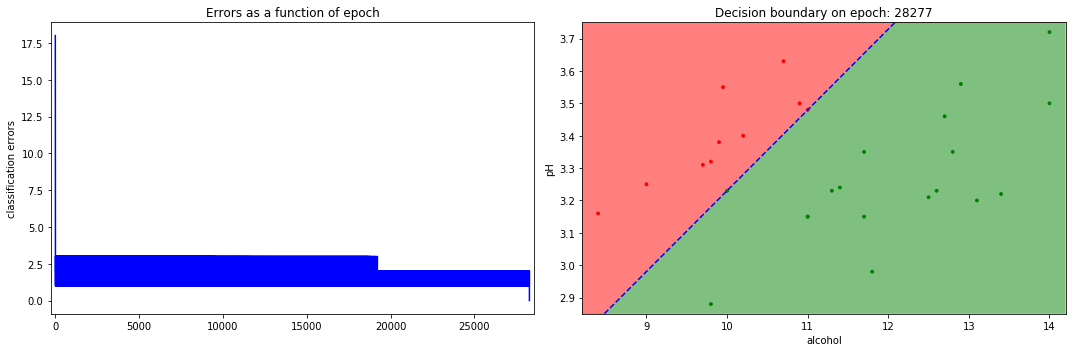

In [77]:
from IPython.display import clear_output

#for i in range(1, len(train_result), 100):
for i in range(0, len(train_result), len(train_result)//100 + 1):
    clear_output(wait=True)
    plot_performance_2d(train_result, wine_data[features + ['quality']], good_thresh_level, bad_thresh_level, i+1)
    time.sleep(0.001)
clear_output(wait=True)
plot_performance_2d(train_result, wine_data[features + ['quality']], good_thresh_level, bad_thresh_level)


In [6]:
%load_ext Cython
import cython

In [7]:
%%cython
from libc.stdlib cimport malloc, free, rand, srand, RAND_MAX
from cpython cimport array
import array

In [8]:
%%cython
cdef struct s_perceptron:
    float *weights;
    float bias;
    int n_weights;
ctypedef s_perceptron t_perceptron
#use malloc!!!!